In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ratio = np.linspace(0, 1, 10)
prices = [[.06488, .03988, 'adriaplin'],
          [.06666, .06666, 'e3 zeleni'],
          [.08923, .05499, 'e3 preprosti'],
          [.10151, .01009, 'e3 napredni'],
          [.06490, .03599, 'gen-i'],
          [.05999, .05999, 'elektro celje']]

In [3]:
def calc(ratio, price_low, price_high):
    return ratio * price_low + (1 - ratio) * price_high

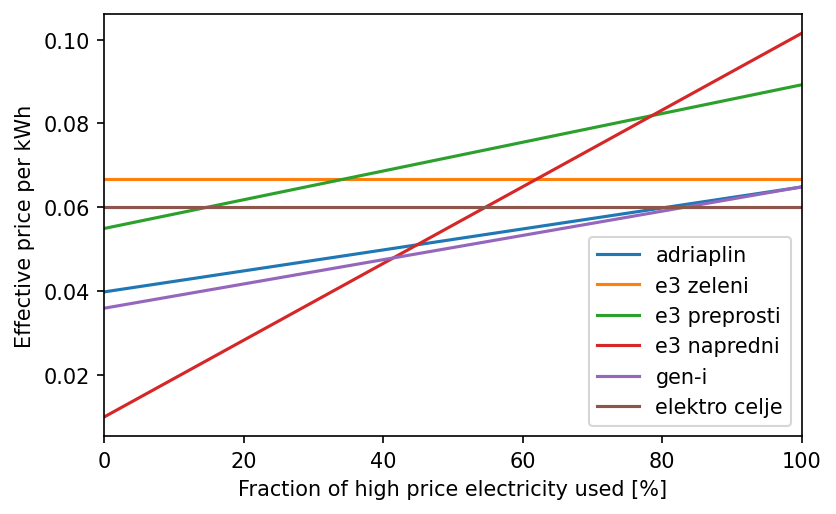

In [4]:
f, ax = plt.subplots(figsize=(6, 6/1.61), dpi=150)
for item in prices:
    plt.plot(ratio*100, calc(ratio, item[0], item[1]), label=item[2])
ax.legend(loc='best')
ax.set_ylabel('Effective price per kWh')
ax.set_xlabel('Fraction of high price electricity used [%]')
ax.set_xlim(0, 100);